In [3]:
import pandas
print (pandas.__version__)

2.2.2


In [5]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [6]:
import pandas as pd 
data = "AnemiaTipos.csv"

dataset = pd.read_csv(data)

dataset

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1146,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1147,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1148,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [7]:
# Librerías para el desarrollo del proyecto
import matplotlib.pyplot as plt  # Librería para gráficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

# Librerías pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

# Enlazando los datos en el archivo CSV
data = pd.read_csv("AnemiaTipos.csv", index_col=None)
import numpy as np
# Invocando a la librería
from lightgbm import LGBMClassifier  # salu2

In [8]:
#Verificamos cuantos tipos de enfermedades hay :V
print(data.groupby('Diagnosis').size())

Diagnosis
Healthy                           336
Iron deficiency anemia            189
Macrocytic anemia                  18
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Other microcytic anemia            59
dtype: int64


In [9]:
X = data[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]

In [10]:
X.shape

(1150, 14)

In [11]:
Y = data['Diagnosis']
#ya = data_datos["CALIFICACION"] 
Y.shape

(1150,)

## CODIFICANDO "Y"

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_codificado = le.fit_transform(Y)

# Mostrar la codificación de cada clase
print("Codificación de clases:")
for i, clase in enumerate(le.classes_):
    print(f"{clase} -> {i}")

Codificación de clases:
Healthy -> 0
Iron deficiency anemia -> 1
Macrocytic anemia -> 2
Normocytic hypochromic anemia -> 3
Normocytic normochromic anemia -> 4
Other microcytic anemia -> 5


In [22]:
print(le.classes_)
##EN ESE ORDEN ESTAN PARA EL SISTEMA, DE AHI SACA 0 1 2 3 4 5 -->

['Healthy' 'Iron deficiency anemia' 'Macrocytic anemia'
 'Normocytic hypochromic anemia' 'Normocytic normochromic anemia'
 'Other microcytic anemia']


In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## PARTICIONAMIENTO DE LA DATA

In [27]:
from sklearn.model_selection import train_test_split

# Aquí usas X sin cambios y la Y codificada
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y_codificado, test_size=0.2, random_state=0)
print("---")
print(f"Entrenamiento: {X_trainset.shape[0]} muestras, {X_trainset.shape[1]} variables")
print(f"Etiquetas entrenamiento: {y_trainset.shape[0]} valores")
print(f"Prueba: {X_testset.shape[0]} muestras, {X_testset.shape[1]} variables")
print(f"Etiquetas prueba: {y_testset.shape[0]} valores")

---
Entrenamiento: 920 muestras, 14 variables
Etiquetas entrenamiento: 920 valores
Prueba: 230 muestras, 14 variables
Etiquetas prueba: 230 valores


## BALANCEANDO

In [30]:
from imblearn.combine import SMOTEENN
from collections import Counter

print("Distribución antes del resampling:", Counter(y_trainset))

os_us = SMOTEENN(sampling_strategy='auto', random_state=0)
X_train_res, y_train_res = os_us.fit_resample(X_trainset, y_trainset)

print("Distribución tras aplicar SMOTE-ENN:", Counter(y_train_res))

Distribución antes del resampling: Counter({0: 272, 3: 225, 4: 208, 1: 151, 5: 49, 2: 15})
Distribución tras aplicar SMOTE-ENN: Counter({2: 259, 5: 229, 4: 198, 0: 195, 1: 184, 3: 109})


## MODELO STACKING

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report
import numpy as np

# Convertir a numpy arrays
X_train_np = X_train_res.values if hasattr(X_train_res, 'values') else np.array(X_train_res)
X_test_np = X_testset.values if hasattr(X_testset, 'values') else np.array(X_testset)

# Modelos base
model_tnet = TabNetClassifier(n_d=16, n_a=16, n_steps=5, gamma=1.3, lambda_sparse=0.0001, optimizer_params=dict(lr=0.002), scheduler_params={"step_size": 10, "gamma": 0.9}, mask_type='sparsemax', momentum=0.3, verbose=0)
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=None, min_samples_leaf=10, splitter='best', random_state=42)
model_lgbm = LGBMClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=31, random_state=42)
model_rf = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2', max_leaf_nodes=None, n_estimators=100, random_state=42)
model_cb = CatBoostClassifier(depth=7, iterations=200, l2_leaf_reg=3, learning_rate=0.1, verbose=0, random_state=42)

meta_model = XGBClassifier(gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Stacking
stacking_model = StackingClassifier(
    estimators=[
        ('lgm', model_lgbm),
        ('rf', model_rf),
        ('tnet', model_tnet),
        ('dt', model_dt),
        ('cb', model_cb),

    ],
    final_estimator=meta_model,
    cv=10,
    passthrough=False,
    n_jobs=-1
)

# Entrenamiento
stacking_model.fit(X_train_np, y_train_res)

# Evaluación
y_pred = stacking_model.predict(X_test_np)
print(classification_report(y_testset, y_pred, digits=7)) 

D:\Archivos de programa\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0  0.9838710 0.9531250 0.9682540        64
           1  0.9743590 1.0000000 0.9870130        38
           2  1.0000000 1.0000000 1.0000000         3
           3  1.0000000 0.9444444 0.9714286        54
           4  0.9523810 0.9836066 0.9677419        61
           5  0.8333333 1.0000000 0.9090909        10

    accuracy                      0.9695652       230
   macro avg  0.9573240 0.9801960 0.9672547       230
weighted avg  0.9713998 0.9695652 0.9698046       230



In [54]:
y_decodificado = le.inverse_transform(y_codificado)

print(y_codificado)
print(y_decodificado)

[3 3 1 ... 0 0 0]
['Normocytic hypochromic anemia' 'Normocytic hypochromic anemia'
 'Iron deficiency anemia' ... 'Healthy' 'Healthy' 'Healthy']


## MÉTRICAS DEL MODELO (TRAIN)

In [62]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# ==== EVALUACIÓN EN ENTRENAMIENTO ====
y_pred_train = stacking_model.predict(X_train_np)
y_probs_train = stacking_model.predict_proba(X_train_np)

print('\n--- MÉTRICAS EN EL CONJUNTO DE ENTRENAMIENTO ---')
print(f'Accuracy: {accuracy_score(y_train_res, y_pred_train):.8f} → {accuracy_score(y_train_res, y_pred_train)*100:.8f} %')
print(f'Precisión: {precision_score(y_train_res, y_pred_train, average="macro"):.8f} → {precision_score(y_train_res, y_pred_train, average="macro")*100:.8f} %')
print(f'Recall (sensibilidad): {recall_score(y_train_res, y_pred_train, average="macro"):.8f} → {recall_score(y_train_res, y_pred_train, average="macro")*100:.8f} %')
print(f'F1-score: {f1_score(y_train_res, y_pred_train, average="macro"):.8f} → {f1_score(y_train_res, y_pred_train, average="macro")*100:.8f} %')

# Cálculo ROC AUC
if len(np.unique(y_train_res)) == 2:
    roc_auc_train = roc_auc_score(y_train_res, y_probs_train[:, 1])
else:
    roc_auc_train = roc_auc_score(LabelBinarizer().fit_transform(y_train_res), y_probs_train, multi_class='ovr')
print(f'ROC AUC: {roc_auc_train:.8f} → {roc_auc_train*100:.8f} %')
print(f'Matthews Correlation Coefficient: {matthews_corrcoef(y_train_res, y_pred_train):.8f} → {matthews_corrcoef(y_train_res, y_pred_train)*100:.8f} %')


--- MÉTRICAS EN EL CONJUNTO DE ENTRENAMIENTO ---
Accuracy: 0.99914821 → 99.91482112 %
Precisión: 0.99927536 → 99.92753623 %
Recall (sensibilidad): 0.99914530 → 99.91452991 %
F1-score: 0.99920844 → 99.92084428 %
ROC AUC: 1.00000000 → 100.00000000 %
Matthews Correlation Coefficient: 0.99896721 → 99.89672055 %


D:\Archivos de programa\Anaconda\Lib\site-packages\torch\utils\data\_utils\collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


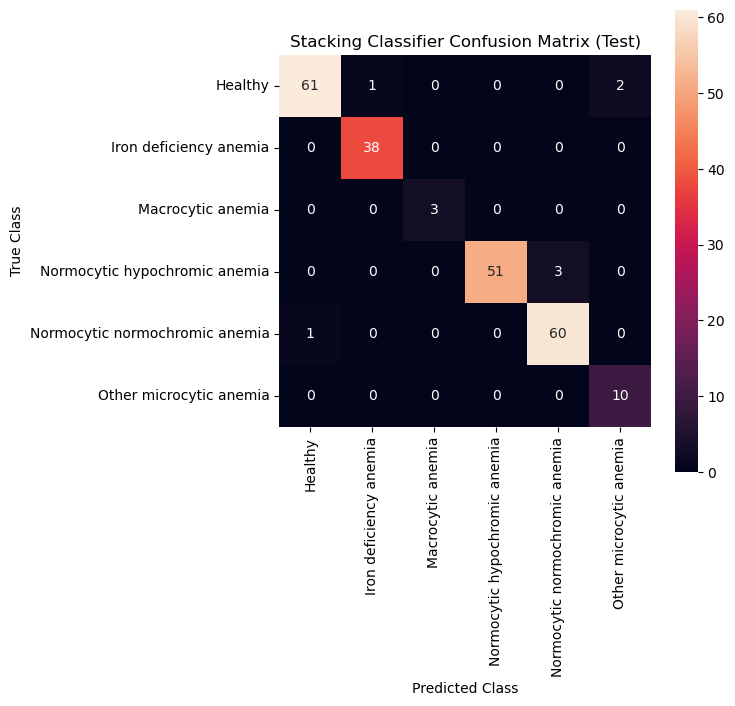

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predicciones del modelo (codificadas)
y_test_pred = stacking_model.predict(X_test_np)

# Decodificar usando tu codificador 'le'
y_true_labels = le.inverse_transform(y_testset)
y_pred_labels = le.inverse_transform(y_test_pred)

# Crear matriz de confusión con nombres de clases reales
conf_matrix = pd.crosstab(y_true_labels, y_pred_labels, rownames=['ACTUAL'], colnames=['Predicción'])

# Gráfico
plt.rcParams["figure.figsize"] = (6, 6)
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking Classifier Confusion Matrix (Test)')
plt.show()

## MÉTRICAS DEL MODELO (TEST)

In [65]:
import warnings
warnings.filterwarnings('ignore')

y_pred_test = stacking_model.predict(X_test_np)
y_probs_test = stacking_model.predict_proba(X_test_np)

print('\n--- MÉTRICAS EN EL CONJUNTO DE PRUEBA ---')
print('Accuracy:', accuracy_score(y_testset, y_pred_test), '→', accuracy_score(y_testset, y_pred_test)*100, '%')
print('Precisión:', precision_score(y_testset, y_pred_test, average='macro'), '→', precision_score(y_testset, y_pred_test, average='macro')*100, '%')
print('Recall (sensibilidad):', recall_score(y_testset, y_pred_test, average='macro'), '→', recall_score(y_testset, y_pred_test, average='macro')*100, '%')
print('F1-score:', f1_score(y_testset, y_pred_test, average='macro'), '→', f1_score(y_testset, y_pred_test, average='macro')*100, '%')

if len(np.unique(y_testset)) == 2:
    roc_auc_test = roc_auc_score(y_testset, y_probs_test[:, 1])
else:
    roc_auc_test = roc_auc_score(LabelBinarizer().fit_transform(y_testset), y_probs_test, multi_class='ovr')
print('ROC AUC:', roc_auc_test, '→', roc_auc_test*100, '%')
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_testset, y_pred_test), '→', matthews_corrcoef(y_testset, y_pred_test)*100, '%')


--- MÉTRICAS EN EL CONJUNTO DE PRUEBA ---
Accuracy: 0.9695652173913043 → 96.95652173913044 %
Precisión: 0.9573240379691992 → 95.73240379691993 %
Recall (sensibilidad): 0.9801960003035823 → 98.01960003035823 %
F1-score: 0.9672547285450511 → 96.72547285450511 %
ROC AUC: 0.9903280176374066 → 99.03280176374066 %
Matthews Correlation Coefficient: 0.9607279159007827 → 96.07279159007827 %


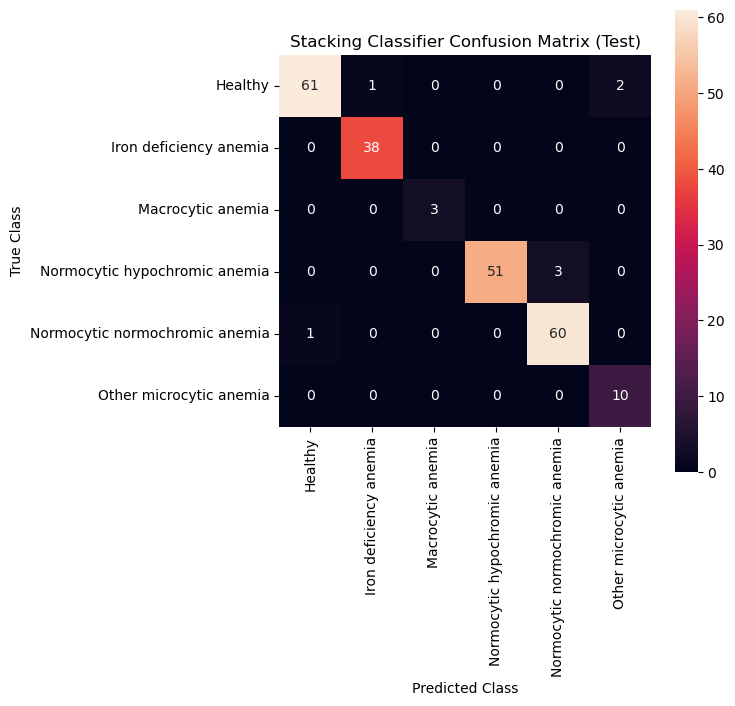

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predicciones del modelo (codificadas)
y_test_pred = stacking_model.predict(X_test_np)

# Decodificar usando tu codificador 'le'
y_true_labels = le.inverse_transform(y_testset)
y_pred_labels = le.inverse_transform(y_test_pred)

# Crear matriz de confusión con nombres de clases reales
conf_matrix = pd.crosstab(y_true_labels, y_pred_labels, rownames=['ACTUAL'], colnames=['Predicción'])

# Gráfico
plt.rcParams["figure.figsize"] = (6, 6)
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking Classifier Confusion Matrix (Test)')
plt.show()

## ROC CURVE (TRAIN)

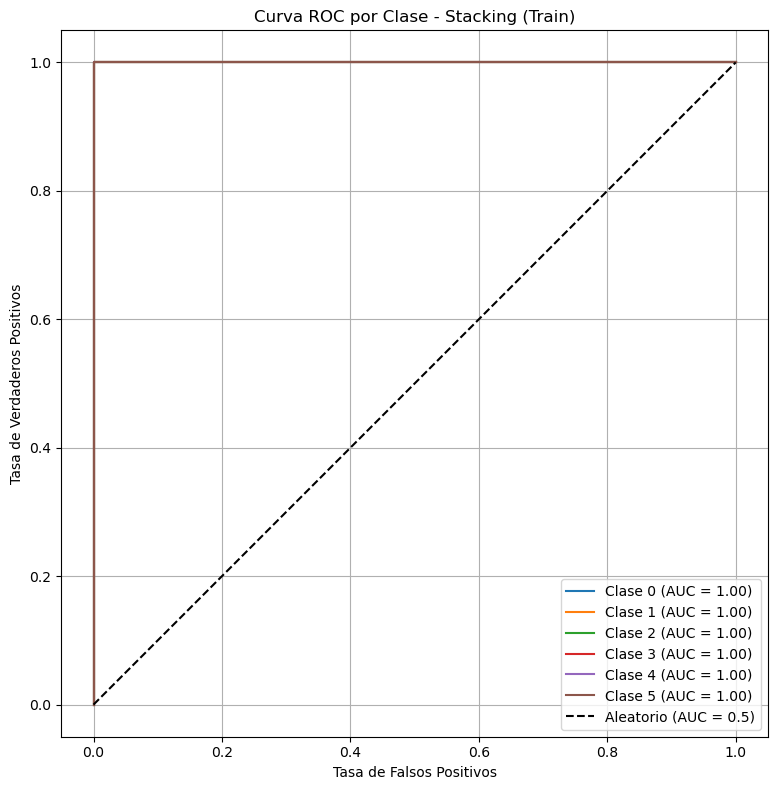

In [74]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# ==== EVALUACIÓN EN ENTRENAMIENTO ====
y_pred_train = stacking_model.predict(X_train_np)
y_probs_train = stacking_model.predict_proba(X_train_np)

# === ROC AUC y CURVAS ROC POR CLASE ===
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_res)

if y_train_bin.shape[1] == 1:
    # Binario
    roc_auc_train = roc_auc_score(y_train_res, y_probs_train[:, 1])
else:
    # Multiclase
    roc_auc_train = roc_auc_score(y_train_bin, y_probs_train, multi_class='ovr')
    # === CURVAS ROC MULTICLASE ===
    plt.figure(figsize=(8, 8))
    for i in range(y_train_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_probs_train[:, i])
        roc_auc = auc(fpr, tpr)
        class_label = lb.classes_[i]
        plt.plot(fpr, tpr, label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC por Clase - Stacking (Train)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.axis('square')
    plt.tight_layout()
    plt.show()


## ROC CURVE (TEST)

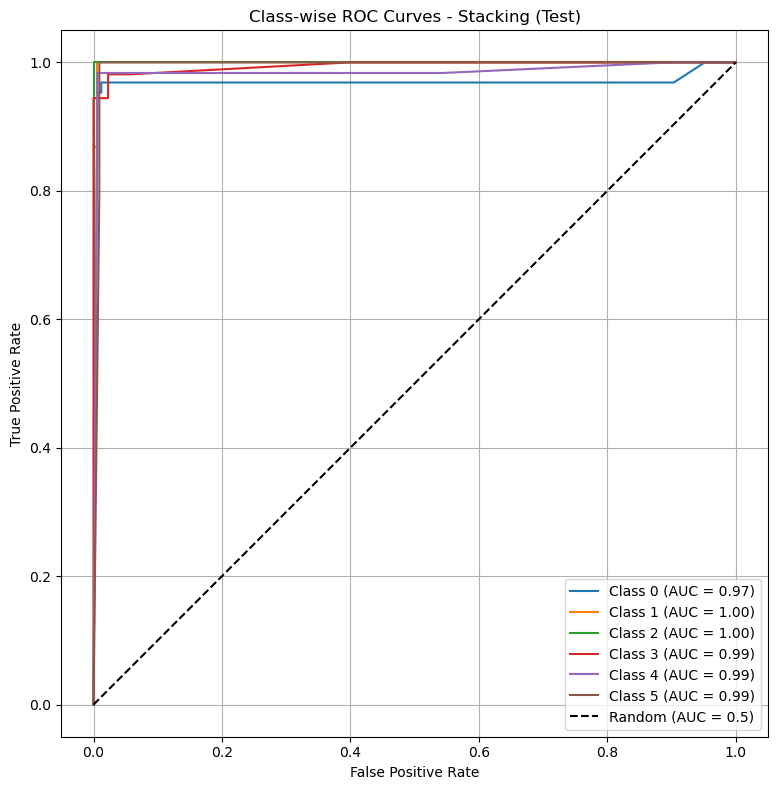

In [77]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# ==== TEST SET EVALUATION ====
y_pred_test = stacking_model.predict(X_test_np)
y_probs_test = stacking_model.predict_proba(X_test_np)

# === ROC AUC and CLASS-WISE ROC CURVES ===
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_testset)

if y_test_bin.shape[1] == 1:
    # Binary case
    roc_auc_test = roc_auc_score(y_testset, y_probs_test[:, 1])    
    # Binary ROC curve
    fpr, tpr, _ = roc_curve(y_testset, y_probs_test[:, 1])
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
    
else:
    # Multiclass case
    roc_auc_test = roc_auc_score(y_test_bin, y_probs_test, multi_class='ovr')

    # Multiclass ROC curves
    plt.figure(figsize=(8, 8))
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_test[:, i])
        roc_auc = auc(fpr, tpr)
        class_label = lb.classes_[i]
        plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Common plot elements
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Class-wise ROC Curves - Stacking (Test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.axis('square')
plt.tight_layout()
plt.show()

## PRECISION RECALL CURVE (TRAIN)

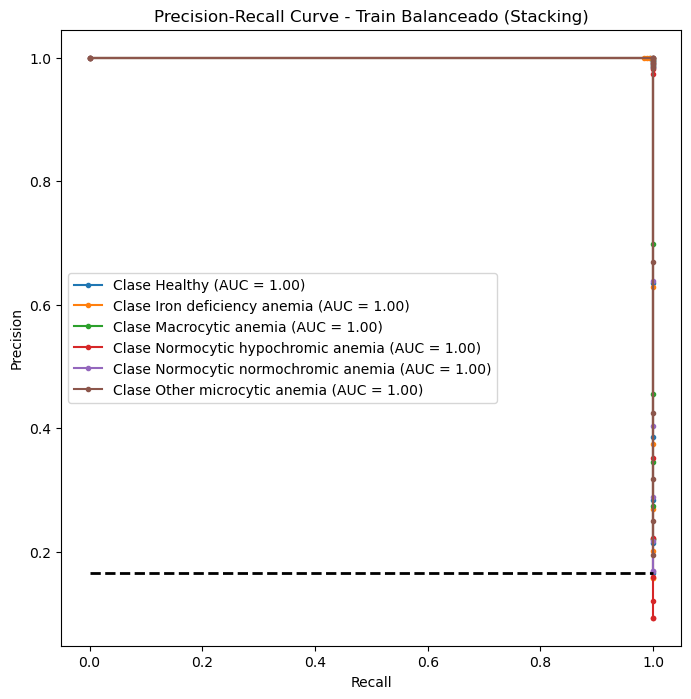

In [80]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Asegurar que los datos estén como arrays
X_train_np = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
y_train_vec = y_train_res.values.ravel() if hasattr(y_train_res, "values") else np.ravel(y_train_res)

# Binarizar etiquetas
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_vec)

# Obtener probabilidades del modelo
probs = stacking_model.predict_proba(X_train_np)

# Gráfico
plt.figure(figsize=(8, 8))

for i in range(y_train_bin.shape[1]):
    lr_precision, lr_recall, _ = precision_recall_curve(y_train_bin[:, i], probs[:, i])
    pr_auc = auc(lr_recall, lr_precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(lr_recall, lr_precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea de referencia (no skill)
no_skill = np.sum(y_train_bin[:, 0]) / len(y_train_bin)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Balanceado (Stacking)')
plt.legend(loc='best')
plt.show()


## PRECISION RECALL CURVE (TEST)

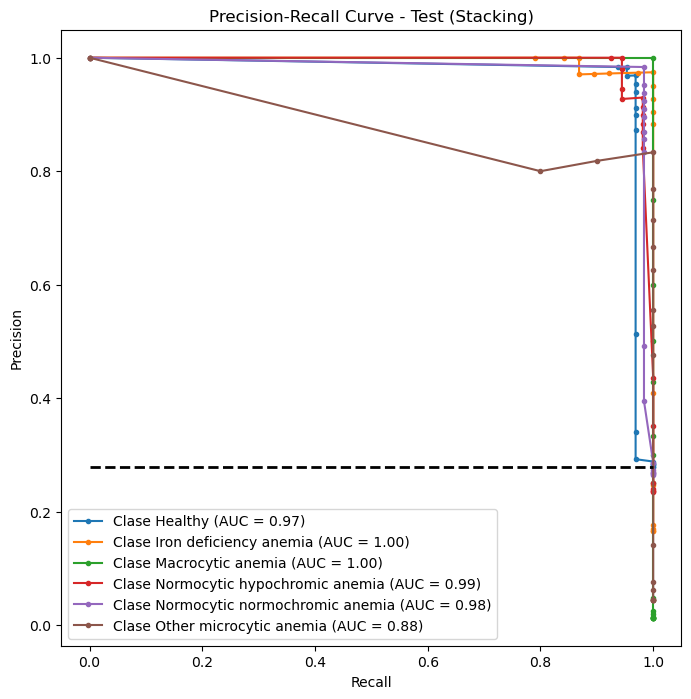

In [83]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Convertir a NumPy
X_test_np = X_testset.values if hasattr(X_testset, "values") else X_testset
y_test_vec = y_testset.values.ravel() if hasattr(y_testset, "values") else np.ravel(y_testset)

# Binarizar etiquetas
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_vec)

# Obtener probabilidades
probs = stacking_model.predict_proba(X_test_np)

# Crear la figura
plt.figure(figsize=(8, 8))

# Curva Precision-Recall por clase
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
    pr_auc = auc(recall, precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(recall, precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea de referencia (no-skill)
no_skill = np.sum(y_test_bin[:, 0]) / len(y_test_bin)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

# Estética
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test (Stacking)')
plt.legend(loc='best')
plt.show()


In [86]:
import joblib
import os

# Crear la carpeta Models si no existe
os.makedirs("Models", exist_ok=True)

# Guardar el modelo y el codificador
joblib.dump({'modelo': stacking_model, 'label_encoder': le}, 'Models/STACKINGXGBOOST.pkl')

['Models/STACKINGXGBOOST.pkl']